# StudentPerformance_GridSearchCrossValidation
This is a duplicate notebook from StudentPerformance_with_NN. In this notebook I will use Grid Search Cross Validation to search for optimum hyperparameter instead of doing it empirically in the previous notebook.

Hyperparameters Grid Search 101: 

https://elutins.medium.com/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596

References: 

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

### Other Notebooks(in this learnign "series"):
1. [Genetic Algorithm with Python](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/GA_with_Python.ipynb) --> Understanding Genetic Algorithm with Python(without libraries)
2. [Predicting Student Performance(Empirically)](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/StudentPerformance_with_NN.ipynb) --> Empirically tune hyper-parameters

***This Notebook*** 3. [Predicting Student Performance(SKLearn's GridSearchCV)](ww) --> Tune hyper-parameters with Sci-Kit Learn's GridSearchCV

4. [Predicting Student Performance(Genetic Algorithm with PyGAD)](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/StudentPerformance_PyGAD.ipynb) --> Tune hyper-parameters with GA using PyGAD
5. [Predicting Student Performance(Genetic Algorithm with Trained Model + PyGAD)](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/StudentPerformance_Tensorflow_PyGAD.ipynb) --> Tune GA hyper-parameters using PyGAD of a trained Model
6. [Some Findings, Comparison, Summary](https://github.com/mocha234/mocha234-DL-repo/blob/main/GeneticAlgorithm/GA_summary.ipynb) --> Summary of this learning "series"

### Index

1. Dataset
2. Packages Needed
3. Data Preprocessing
4. Grid Search Cross Validation
5. Inference
6. Some findings

## 1. Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Student+Performance

### Description

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

### Note: In this notebook, I used the Dataset with Portuguese Language

In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. 

This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd-period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)* 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)


## 2. Packages Needed

In [35]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import MaxNorm
from tensorflow import convert_to_tensor

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)
%matplotlib inline

### 3. Data Preprocessing

Here, I will find for empty data, encode categorical data, plot some graph to understand the data.

In [2]:
df = pd.read_csv("student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
# df.dtypes

In [5]:
# df.isnull().sum() 
# Check for missing data

In [6]:
features_list = list(df.columns)[:-1]
print("Features: {x}".format(x = features_list))
print("\nNumber of Features: {x}".format(x = len(features_list)))

Features: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Number of Features: 32


In [7]:
# df.info()
# # Check datatype of features

In [8]:
features = df.drop(["G3"], axis = 1)
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10


In [9]:
target = df.drop(features_list, axis = 1)
target

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


In [10]:
mapping_school = {'GP' : 0, 'MS' : 1}
mapping_sex = {'F' : 0, 'M' : 1}
mapping_address = {'U' : 0, 'R' : 1}
mapping_famsize = {'GT3' : 0, 'LE3' : 1}
mapping_pstatus = {'A' : 0, 'T' : 1}
mapping_mjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_fjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_reason = {'course' : 0, 'other' : 1, 'home' : 2, 'reputation' : 3}
mapping_guardian = {'mother' : 0, 'father' : 1, 'other': 2}
mapping_schoolsup = {'no' : 0, 'yes' : 1}
mapping_famsup = {'no' : 0, 'yes' : 1}
mapping_romantic = {'no' : 0, 'yes' : 1}
mapping_paid = {'no' : 0, 'yes' : 1}
mapping_activities = {'no' : 0, 'yes' : 1}
mapping_nursery = {'no' : 0, 'yes' : 1}
mapping_higher = {'no' : 0, 'yes' : 1}
mapping_internet = {'no' : 0, 'yes' : 1}

In [11]:
df['school'] = features['school'].map(mapping_school)
df['sex'] = features['sex'].map(mapping_sex)
df['address'] = features['address'].map(mapping_address)
df['famsize'] = features['famsize'].map(mapping_famsize)
df['Pstatus'] = features['Pstatus'].map(mapping_pstatus)
df['Mjob'] = features['Mjob'].map(mapping_mjob)
df['Fjob'] = features['Fjob'].map(mapping_fjob)
df['reason'] = features['reason'].map(mapping_reason)
df['guardian'] = features['guardian'].map(mapping_guardian).astype('Int64')
df['famsup'] = features['famsup'].map(mapping_famsup)
df['schoolsup'] = features['schoolsup'].map(mapping_schoolsup)
df['romantic'] = features['romantic'].map(mapping_romantic)
df['paid'] = features['paid'].map(mapping_paid)
df['activities'] = features['activities'].map(mapping_activities)
df['nursery'] = features['nursery'].map(mapping_nursery)
df['higher'] = features['higher'].map(mapping_higher)
df['internet'] = features['internet'].map(mapping_internet)

In [12]:
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10


In [13]:
# features.dtypes

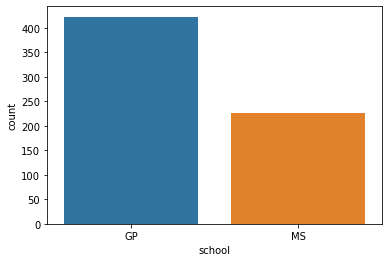

In [14]:
sns.countplot(x='school', data=features);

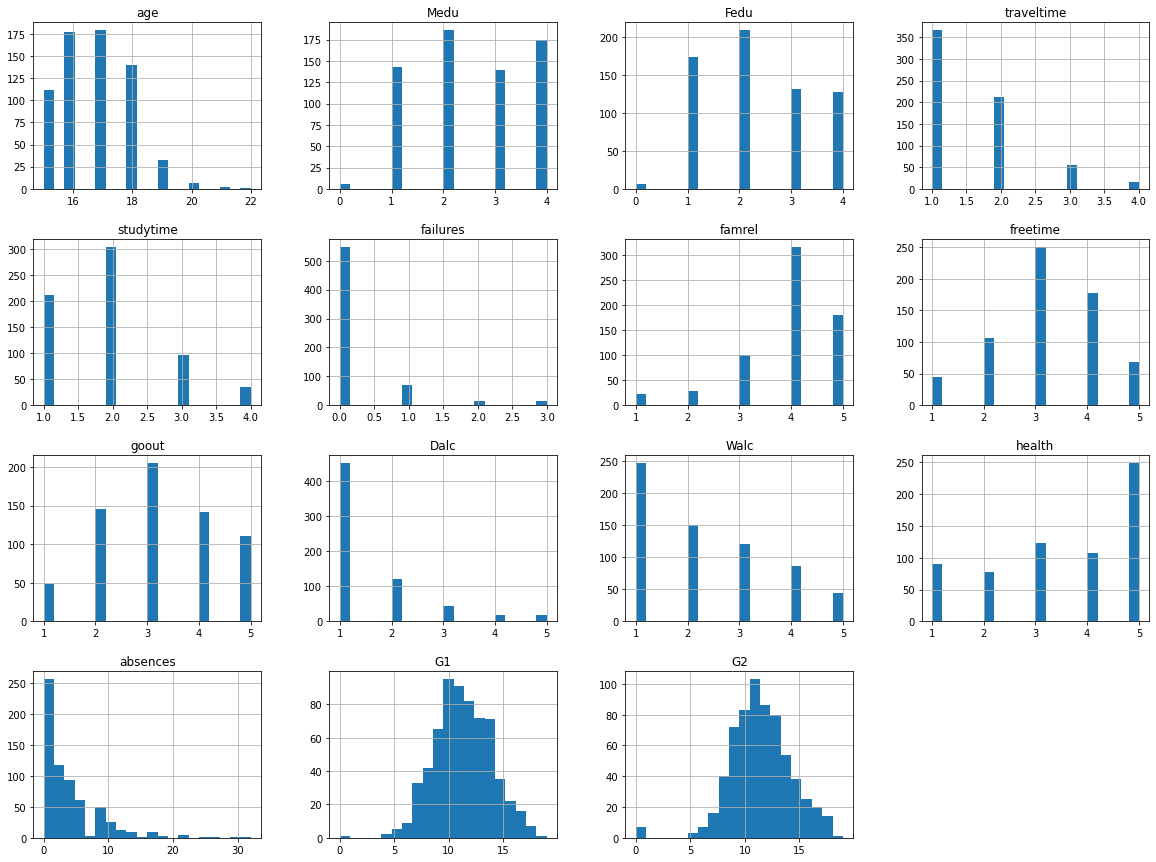

In [15]:
features.hist(bins=20, figsize=(20,15));

#### Outliers

As I go through the data, I found there are students who achieve 0 in their G3 depsite having more than half during their G1 & G2 examinations. 
The outliers might affect model's performance, hence I decided to drop those outliers.

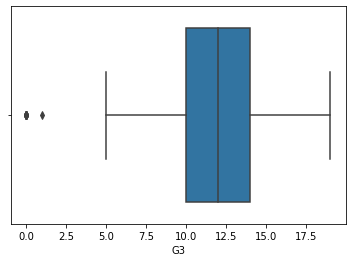

In [16]:
sns.boxplot(x=target["G3"]);

#### Drop Outliers data if certain requirement satisfied.

G3 with score of 2.5 and less considered as Outliers. To understand this data, I will list down these outliers.

In [17]:
df_outliers = df[df["G3"]<2.5]
df_outliers

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
163,0,1,18,0,1,1,1,1,2,2,0,0,1,1,2,0,0,0,0,1,0,1,1,2,3,5,2,5,4,0,11,9,0
172,0,1,16,0,0,1,3,3,2,3,0,1,1,2,1,0,1,0,0,1,1,1,1,4,5,5,4,4,5,0,10,10,1
440,1,1,16,0,0,1,1,1,0,3,2,0,2,2,0,0,1,0,1,1,1,0,1,5,4,5,4,5,3,0,7,0,0
519,1,1,16,1,0,1,2,1,2,3,3,0,2,2,0,0,0,0,1,1,1,1,0,5,2,1,1,1,2,0,8,7,0
563,1,1,17,0,0,1,2,2,2,2,0,0,1,1,1,0,0,0,1,1,1,0,1,1,2,1,2,3,5,0,7,0,0
567,1,1,18,1,0,1,3,2,3,2,0,0,1,1,1,0,0,0,0,1,0,1,0,2,3,1,2,2,5,0,4,0,0
583,1,0,18,1,0,1,2,2,2,2,1,0,2,1,1,0,0,0,0,1,0,1,1,5,5,5,1,1,3,0,8,6,0
586,1,0,17,0,0,1,4,2,4,3,2,0,1,2,0,1,1,0,1,1,1,1,0,5,5,5,1,3,5,0,8,8,0
597,1,0,18,1,0,1,2,2,0,2,0,0,3,2,1,0,0,0,1,1,1,0,1,4,3,3,1,1,4,0,9,0,0
603,1,0,18,1,1,0,4,2,4,2,3,0,1,2,0,0,0,0,1,1,1,1,1,5,3,1,1,1,5,0,5,0,0


In [18]:
len(df_outliers.index)

16

In [19]:
df["G1"].mean()

11.399075500770415

In [20]:
df["G2"].median()

11.0

#### Dropping rows if:

G3 considered as outliers when G1 or G2 above average.

In [21]:
outlier_idx = df[df["G3"] < 2.5].index
len(outlier_idx) 
df = df.drop(outlier_idx)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,4,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,0,1,1,1,0,2,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,1,1,1,1,0,2,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,0,1,4,2,1,3,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,0,1,3,3,2,2,2,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,2,0,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10
645,1,0,18,0,1,1,3,1,4,3,0,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,0,1,1,1,2,2,0,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9
647,1,1,17,0,1,1,3,1,3,3,0,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10


### Reassign features and target dataframe after dropping outliers

In [22]:
target = df.drop(features_list, axis = 1)
features = df.drop(["G3"], axis = 1)

## 4. Grid Search Cross Validation

Here the real thing begins. We will use Sci-Kit Learn's GridSearchCV to find the optimal hypter parameters for the model for this problem.

#### To be tuned:

1. Batch Size & Number of Epochs with Training Optimization Algorithm
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

#### Search/Tuning Flow:
1. Define Model
2. Wrap Keras model with KerasRegressor of Sci-Kit Learn
3. Define Grid Parameters
4. Train model with Grid Parameters defined
5. Summarize Results

Note: Set verbose = 0, as it's gonna be long list.

#### Data normalization

#### Split Training and Testing data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3,random_state=11)

In [57]:
X_train.shape

(443, 32)

In [25]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

In [26]:
X_train_unscaled = scaler.inverse_transform(X_train_scaled).astype('float64') 
y_train_unscaled = scaler.inverse_transform(y_train_scaled).astype('float64') 
X_test_unscaled = scaler.inverse_transform(X_test_scaled).astype('float64') 
y_test_unscaled = scaler.inverse_transform(y_test_scaled).astype('float64') 

In [27]:
X_test.shape, X_train.shape

((190, 32), (443, 32))

### Here we go!

### Batch Size & Number of Epochs with Training Optimization Algorithm 

1. ###### Batch Size & Number of Epochs with Training Optimization Algorithm (This section)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm 
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

Based on the best parameter obtained, we can further fine tune it. For instance, the Adam optimizer used with default Learning Rate of 0.001. Here, GridSearchCV is used again to search for best Learning Rate.

In [28]:
def create_model(optimizer='adam'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


In [29]:
model = KerasRegressor(build_fn=create_model, verbose=0)

In [75]:
# define the grid search parameters
batch_size = [10, 50]
epochs = [10, 50, 100, 200, 500, 700, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam']


param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [76]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.009181 using {'batch_size': 10, 'epochs': 700, 'optimizer': 'Adam'}
-0.279537 (0.185846) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'SGD'}
-0.153868 (0.186314) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.283783 (0.180655) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adagrad'}
-0.017520 (0.004620) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adam'}
-0.016705 (0.002449) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
-0.281458 (0.192481) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'RMSprop'}
-0.022869 (0.007195) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adagrad'}
-0.151504 (0.196080) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adam'}
-0.017360 (0.004792) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'SGD'}
-0.152149 (0.195659) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'RMSprop'}
-0.019997 (0.005539) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adagrad'}
-0.012150 (0.0

Some reading on the negative values on scoring : 

https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error

### Learning Rate

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 700, Optimzation Algorithm: Adam)
3. ###### Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (This section)
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

Based on the best parameter obtained, we can further fine tune it. For instance, the Adam optimizer used with default Learning Rate of 0.001. Here, GridSearchCV is used again to search for best Learning Rate.

In [77]:
def create_model_Adam(learn_rate=0.001):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    optimizer = Adam(lr = learn_rate)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_Adam = KerasRegressor(build_fn=create_model_Adam, epochs=700, batch_size=10,  verbose=0)

In [79]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.005, 0.1]

param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model_Adam, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [80]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.008193 using {'learn_rate': 0.01}
-0.149856 (0.197258) with: {'learn_rate': 0.001}
-0.008193 (0.002773) with: {'learn_rate': 0.01}
-0.008898 (0.002184) with: {'learn_rate': 0.005}
-0.417256 (0.009306) with: {'learn_rate': 0.1}


### Network Weight Initialization

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 700, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. ###### Network Weight Initialization(This section)
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer


In [26]:
def create_model_weight_init(init_mode = 'uniform'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu', kernel_initializer=init_mode),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_weight_init = KerasRegressor(build_fn=create_model_weight_init, epochs=700, batch_size=10, verbose=0)

In [27]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_weight_init, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [28]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.007511 using {'init_mode': 'lecun_uniform'}
-0.009289 (0.001876) with: {'init_mode': 'uniform'}
-0.007511 (0.000750) with: {'init_mode': 'lecun_uniform'}
-0.010183 (0.000559) with: {'init_mode': 'normal'}
-0.419239 (0.008901) with: {'init_mode': 'zero'}
-0.008358 (0.000608) with: {'init_mode': 'glorot_normal'}
-0.010530 (0.002378) with: {'init_mode': 'glorot_uniform'}
-0.146964 (0.194618) with: {'init_mode': 'he_normal'}
-0.009648 (0.001557) with: {'init_mode': 'he_uniform'}


### Neuron Activation Function

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 700, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(lecun_uniform)
5. ###### Neuron Activation Function (This section)
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

In [31]:
def create_model_act_func(activation='relu', output_activation = 'sigmoid'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu', kernel_initializer='lecun_uniform'),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation=output_activation)
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_act_func = KerasRegressor(build_fn=create_model_act_func, epochs=700, batch_size=10, verbose=0)

In [32]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
output_activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation, output_activation=output_activation)
grid = GridSearchCV(estimator=model_act_func, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [33]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.007706 using {'activation': 'linear', 'output_activation': 'linear'}
-0.168630 (0.008872) with: {'activation': 'softmax', 'output_activation': 'softmax'}
-0.009161 (0.001533) with: {'activation': 'softmax', 'output_activation': 'softplus'}
-0.024258 (0.008749) with: {'activation': 'softmax', 'output_activation': 'softsign'}
-0.286598 (0.181235) with: {'activation': 'softmax', 'output_activation': 'relu'}
-0.024121 (0.008951) with: {'activation': 'softmax', 'output_activation': 'tanh'}
-0.010295 (0.001206) with: {'activation': 'softmax', 'output_activation': 'hard_sigmoid'}
-0.028771 (0.003188) with: {'activation': 'softmax', 'output_activation': 'linear'}
-0.168630 (0.008872) with: {'activation': 'softplus', 'output_activation': 'softmax'}
-0.008475 (0.000064) with: {'activation': 'softplus', 'output_activation': 'softplus'}
-0.010775 (0.001842) with: {'activation': 'softplus', 'output_activation': 'softsign'}
-0.419239 (0.008901) with: {'activation': 'softplus', 'output_activ

### Dropout Regularization

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 700, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. Neuron Activation Function (activation=tanH, output_activation = SoftPlus)
6. ###### Dropout Regularization (This section)
7. Number of Neurons in the Hidden Layer

### Check if the model is overfitting. 
If overfit --> add Dropout layer to regularize it, else skip having dropout layer(s).

In [38]:
def create_model_current(activation= 'linear', output_activation = 'linear'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation=activation, kernel_initializer='lecun_uniform'),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation=output_activation)
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_current = create_model_current()

In [39]:
history = model_current.fit(X_train, y_train, epochs=700, batch_size=10,  verbose=0, validation_split=0.2)

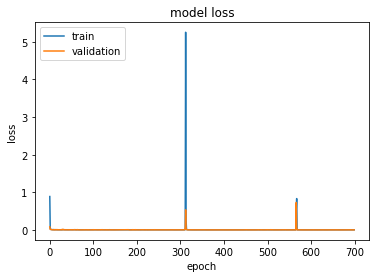

In [40]:
# print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
mean_squared_e = mean_squared_error(y_test, model_current.predict(X_test))
mean_absolute_e = mean_absolute_error(y_test, model_current.predict(X_test))

print("Mean Squared Error: {:.5f}".format(mean_squared_e))
print("Mean Absolute Error: {:.5f}".format(mean_absolute_e))

Mean Squared Error: 0.00700
Mean Absolute Error: 0.05615


Based on the graph, it's overfitting, hence, will use Dropout to regularize it.

In [41]:
def create_model_dropout(dropout_rate=0.0, weight_constraint=0):
    
    model = Sequential([
        Dense(32, 
              input_dim=32, 
              activation='linear', 
              kernel_initializer='lecun_uniform',
              kernel_constraint=MaxNorm(weight_constraint),
             ),
        Dense(64, activation='linear'),
        Dropout(dropout_rate),
        Dense(32, activation='linear'),
        Dense(1, activation='linear')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_dropout = KerasRegressor(build_fn=create_model_dropout, epochs=700, batch_size=10, verbose=0)

In [42]:
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model_dropout, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [43]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.005696 using {'dropout_rate': 0.2, 'weight_constraint': 5}
-0.008676 (0.003370) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
-0.006832 (0.002109) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
-0.006418 (0.000472) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
-0.007079 (0.000357) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
-0.006290 (0.000567) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
-0.009926 (0.002168) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
-0.005843 (0.000249) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
-0.007070 (0.000789) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
-0.006986 (0.001584) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
-0.007178 (0.001208) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
-0.006401 (0.000703) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
-0.007322 (0.001090) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
-0.006321 (0.000185) with: {'dropout_rate': 0.2, 'weight

### Neuron Activation Function

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. Neuron Activation Function (activation=tanH, output_activation = SoftPlus)
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer(This section)

In [44]:
def create_model_neurons_hidden_layer(neurons_h_layer_1 = 1, neurons_h_layer_2 = 1):
    
    model = Sequential([
        Dense(32, 
              input_dim=32, 
              activation='linear', 
              kernel_initializer='lecun_uniform',
              kernel_constraint=MaxNorm(5),
             ),
        Dense(neurons_h_layer_1, activation='linear'),
        Dropout(0.2),
        Dense(neurons_h_layer_2, activation='linear'),
        Dense(1, activation='linear')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_neurons_hidden_layer = KerasRegressor(build_fn=create_model_neurons_hidden_layer, epochs=700, batch_size=10, verbose=0)

In [45]:
# define the grid search parameters
neurons_h_layer_1 = [8, 16, 32, 64, 128]
neurons_h_layer_2 = [16, 32, 64, 128]
param_grid = dict(neurons_h_layer_1=neurons_h_layer_1, neurons_h_layer_2=neurons_h_layer_2)
grid = GridSearchCV(estimator=model_neurons_hidden_layer, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [46]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.004469 using {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 32}
-0.005880 (0.001828) with: {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 16}
-0.004469 (0.001343) with: {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 32}
-0.005019 (0.002687) with: {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 64}
-0.004588 (0.001767) with: {'neurons_h_layer_1': 8, 'neurons_h_layer_2': 128}
-0.005357 (0.002798) with: {'neurons_h_layer_1': 16, 'neurons_h_layer_2': 16}
-0.005053 (0.001243) with: {'neurons_h_layer_1': 16, 'neurons_h_layer_2': 32}
-0.004617 (0.001724) with: {'neurons_h_layer_1': 16, 'neurons_h_layer_2': 64}
-0.005306 (0.001086) with: {'neurons_h_layer_1': 16, 'neurons_h_layer_2': 128}
-0.005038 (0.001186) with: {'neurons_h_layer_1': 32, 'neurons_h_layer_2': 16}
-0.006015 (0.001433) with: {'neurons_h_layer_1': 32, 'neurons_h_layer_2': 32}
-0.005585 (0.002128) with: {'neurons_h_layer_1': 32, 'neurons_h_layer_2': 64}
-0.007054 (0.003031) with: {'neurons_h_layer_1': 32, 'neurons_h_layer_2'

### Optimal Parameters

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. Neuron Activation Function (activation=tanH, output_activation = SoftPlus)
6. Dropout Regularization (dropout_rate: 0.0, weight_constraint: 5)
7. Number of Neurons in the Hidden Layer(First Hidden layer = 8, Second Hidden layer = 32)

#### Grid Searched CV's model

With the best parameter GridSearchCV could find based on given set of parameters grid. Now we instantiate a model and train it.

In [30]:
def create_model_gridsearched():
    
    model = Sequential([
        Dense(32, 
              input_dim=32, 
              activation='linear', 
              kernel_initializer='lecun_uniform',
              kernel_constraint=MaxNorm(5),
             ),
        Dense(8, activation='linear'),
        Dropout(0.2),
        Dense(32, activation='linear'),
        Dense(1, activation='linear')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_gridsearched = create_model_gridsearched()

In [31]:
history_model_gridsearched = model_gridsearched.fit(X_test_scaled, y_test_scaled, epochs=700, batch_size=10,  verbose=1, validation_split=0.2)

Epoch 1/700
16/16 [==============================] - 0s 8ms/step - loss: 0.1253 - mse: 0.1253 - mae: 0.2791 - val_loss: 0.0603 - val_mse: 0.0603 - val_mae: 0.1960
Epoch 2/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0384 - mse: 0.0384 - mae: 0.1576 - val_loss: 0.0328 - val_mse: 0.0328 - val_mae: 0.1376
Epoch 3/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0295 - mse: 0.0295 - mae: 0.1368 - val_loss: 0.0304 - val_mse: 0.0304 - val_mae: 0.1383
Epoch 4/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262 - mae: 0.1303 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1229
Epoch 5/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.1220 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.1211
Epoch 6/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0188 - mse: 0.0188 - mae: 0.1113 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1432
Epoch 7/700
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0808 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1170
Epoch 52/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0104 - mse: 0.0104 - mae: 0.0770 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.1006
Epoch 53/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0733 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0746
Epoch 54/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0726 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0654
Epoch 55/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0689 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0704
Epoch 56/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0589 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0758
Epoch 57/700
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0672 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0632
Epoch 102/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0737 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0757
Epoch 103/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0796 - val_loss: 0.0118 - val_mse: 0.0118 - val_mae: 0.0875
Epoch 104/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0673 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0747
Epoch 105/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0673 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0598
Epoch 106/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0654 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0624
Epoch 107/700
16/16 [===

Epoch 151/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0685 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0697
Epoch 152/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0651 - val_loss: 0.0073 - val_mse: 0.0073 - val_mae: 0.0700
Epoch 153/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0690 - val_loss: 0.0073 - val_mse: 0.0073 - val_mae: 0.0681
Epoch 154/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0658 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0573
Epoch 155/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0107 - mae: 0.0800 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0570
Epoch 156/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0733 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0786
Epoch 157/

Epoch 201/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0786 - val_loss: 0.0098 - val_mse: 0.0098 - val_mae: 0.0811
Epoch 202/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0678 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0712
Epoch 203/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0631 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0719
Epoch 204/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0609 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0682
Epoch 205/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0662 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0692
Epoch 206/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0583 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0555
Epoch 207/

Epoch 251/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0720 - val_loss: 0.0096 - val_mse: 0.0096 - val_mae: 0.0786
Epoch 252/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0652 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0581
Epoch 253/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0651 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0580
Epoch 254/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0598 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0662
Epoch 255/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0764 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0528
Epoch 256/700
16/16 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0689 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0505
Epoch 257/

Epoch 301/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0616 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0568
Epoch 302/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0673 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0605
Epoch 303/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0587 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0542
Epoch 304/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0670 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0631
Epoch 305/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0629 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0605
Epoch 306/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0619 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0661
Epoch 307/

Epoch 351/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0634 - val_loss: 0.0116 - val_mse: 0.0116 - val_mae: 0.0865
Epoch 352/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0618 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0830
Epoch 353/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0684 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0607
Epoch 354/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0628 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0659
Epoch 355/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0639 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0597
Epoch 356/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0624 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0565
Epoch 357/

Epoch 401/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0679 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0643
Epoch 402/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0650 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0570
Epoch 403/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0622 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0667
Epoch 404/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0620 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0531
Epoch 405/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0618 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0551
Epoch 406/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0592 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0553
Epoch 407/

Epoch 451/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0611 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0550
Epoch 452/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0608 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0857
Epoch 453/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0672 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0725
Epoch 454/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0639 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0668
Epoch 455/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0620 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0559
Epoch 456/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0663 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0691
Epoch 457/

Epoch 501/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0595 - val_loss: 0.0067 - val_mse: 0.0067 - val_mae: 0.0657
Epoch 502/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0659 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0575
Epoch 503/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0570 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0610
Epoch 504/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0636 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0603
Epoch 505/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0602 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0595
Epoch 506/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0653 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0574
Epoch 507/

Epoch 551/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0601 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0545
Epoch 552/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0602 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0503
Epoch 553/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0615 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0581
Epoch 554/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0561 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0606
Epoch 555/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0569 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0635
Epoch 556/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0609 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0575
Epoch 557/

Epoch 601/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0676 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0691
Epoch 602/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0737 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0770
Epoch 603/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0674 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0797
Epoch 604/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0683 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0648
Epoch 605/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0668 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0542
Epoch 606/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0557 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0510
Epoch 607/

Epoch 651/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0569 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0659
Epoch 652/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0618 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0690
Epoch 653/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0622 - val_loss: 0.0097 - val_mse: 0.0097 - val_mae: 0.0791
Epoch 654/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0674 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0637
Epoch 655/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0582 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0589
Epoch 656/700
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0571 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0484
Epoch 657/

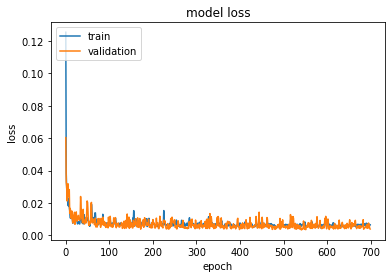

In [32]:
# print(history.history.keys())
plt.plot(history_model_gridsearched.history['loss'])
plt.plot(history_model_gridsearched.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
X_test_np = X_test.values.astype(int)
y_test_np = y_test.values.astype(int)
X_test_np = convert_to_tensor(X_test_np)
y_test_np = convert_to_tensor(y_test_np)

In [38]:
loss, mean_sq_e, mean_abs_e = model_gridsearched.evaluate(X_test_np, y_test_np)

print("Mean Squared Error : {:.5f}".format(mean_sq_e))
print("Mean Absolute Error : {:.5f}".format(mean_abs_e))

6/6 [==============================] - 0s 1ms/step - loss: 5.7227 - mse: 5.7227 - mae: 2.2019
Mean Squared Error : 5.72268
Mean Absolute Error : 2.20194


## Inference

In [43]:
df2 = features.iloc[2] # Test with the 14th Student 
Xnew = np.array([df2])
Xnew.reshape(-1, 1)

Xnew= scaler.transform(Xnew)
ynew= model_gridsearched.predict(Xnew)

# #invert normalize
ynew = scaler.inverse_transform(ynew) 
Xnew = scaler.inverse_transform(Xnew)

#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
print("Predicted G3's score is {:.2f}".format(float(ynew)))

Predicted G3's score is 14.02


In [51]:
predictions = model_gridsearched.predict(X_test_scaled)
predictions = scaler.inverse_transform(predictions)
predictions = np.round(predictions, 2)

In [52]:
diff_list = []

for i in range(0,len(y_test)):
    
    g_truth = float(y_test_np[i])
    p = float(predictions[i])
    diff = np.abs(p-g_truth)
    diff_list.append(diff)
    print(i)  
    print("Real Values :", g_truth)
    print("Predicted G3's score is {:.2f}".format(p))
    print("Difference : {:.3f}".format(diff))

0
Real Values : 14.0
Predicted G3's score is 14.17
Difference : 0.170
1
Real Values : 12.0
Predicted G3's score is 12.09
Difference : 0.090
2
Real Values : 10.0
Predicted G3's score is 9.32
Difference : 0.680
3
Real Values : 19.0
Predicted G3's score is 18.35
Difference : 0.650
4
Real Values : 13.0
Predicted G3's score is 13.53
Difference : 0.530
5
Real Values : 15.0
Predicted G3's score is 16.14
Difference : 1.140
6
Real Values : 10.0
Predicted G3's score is 10.25
Difference : 0.250
7
Real Values : 11.0
Predicted G3's score is 12.17
Difference : 1.170
8
Real Values : 11.0
Predicted G3's score is 12.05
Difference : 1.050
9
Real Values : 11.0
Predicted G3's score is 10.96
Difference : 0.040
10
Real Values : 15.0
Predicted G3's score is 14.82
Difference : 0.180
11
Real Values : 16.0
Predicted G3's score is 16.47
Difference : 0.470
12
Real Values : 10.0
Predicted G3's score is 10.87
Difference : 0.870
13
Real Values : 11.0
Predicted G3's score is 10.41
Difference : 0.590
14
Real Values : 

### Mean Absolute Error after applying genetic algorithm

In [56]:
mean_abs_e_on_test_set = sum(diff_list) / len(y_test)
# mean_abs_e_on_test_set = mean_absolute_error(y_test_np, predictions)
print("Mean Absolute Error : {:.5f}".format(mean_abs_e_on_test_set))

Mean Absolute Error : 0.65742


#### Check those with difference(between predicted and ground truth) that exceeds 3.

In [53]:
exceed3idx = []
def check(diff_list):
    for idx, diff in enumerate(diff_list):
        if diff > 3:
            exceed3idx.append(idx)
    print(exceed3idx)

In [54]:
check(diff_list)

[83]


In [55]:
len(exceed3idx)

1